In [6]:
%reset -f

In [7]:
import torch
from matplotlib import pyplot as plt

In [8]:
xc = torch.arange(-1,1,1/256).reshape((-1,1))

In [9]:
def shannon_cosine(xc, j):
    mm = (3.2**2) * (1**2)
    t = torch.pi * xc / 1
    ss = torch.sin(t) 
    ee = torch.exp(-torch.square(xc) / (2 * mm))
    out = torch.divide((ss * ee), t)
    out[torch.where(t==0.)] = 1.
    return out
    # # m = 3
    # zeroidx = torch.where(xc == 0)
    # sc1 = torch.zeros_like(xc)
    # sc1[zeroidx] = 1
    # sc1[~(xc == 0)] = torch.sin(torch.pi*xc[~(xc == 0)]) / (torch.pi*xc[~(xc == 0)])
    # Nval = 15.189881678612
    # Nval = Nval*(2**j)
    # a3 = 0.03125
    # a2 = 6 * a3
    # a1 = 15 * a3
    # a0 = 10 * a3
    # xc_tmp = xc / Nval
    # sc2 = a0 + \
    #     a1 * torch.cos(2*torch.pi*xc_tmp) + \
    #     a2 * torch.cos(4*torch.pi*xc_tmp) + \
    #     a3 * torch.cos(6*torch.pi*xc_tmp)
    
    # sc = sc1 * sc2
    
    # middle_idx = sc.shape[0] // 2
    # idxsc = ((xc >= xc[middle_idx]-Nval/2) & (xc <= xc[middle_idx]+Nval/2))
    # sc3 = torch.zeros_like(sc)
    # sc3[idxsc] = sc[idxsc]

    return sc3

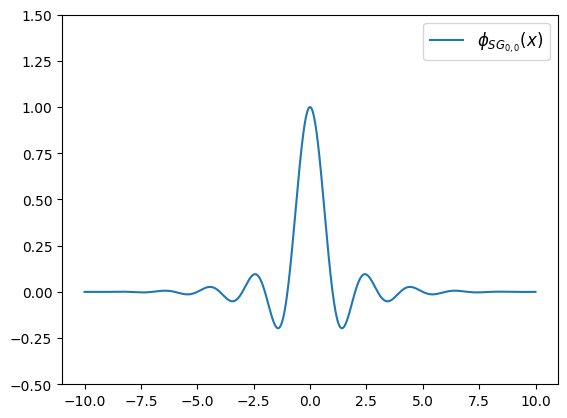

In [15]:
xt = torch.arange(-10,10,1/256).reshape((-1,1))
yt = shannon_cosine(xt, 0)
plt.plot(xt,yt)
plt.ylim(-0.5, 1.5)
plt.legend(['$\phi_{SG_{0,0}}(x)$'], fontsize=12, loc='upper right')


In [6]:
def get_phi(x):

    # out = torch.zeros_like(x)
    # out[(x >= -1) & (x < 0)] = x[(x >= -1) & (x < 0)] + 1
    # out[(x >= 0) & (x <= 1)] = 1 - x[(x >= 0) & (x <= 1)]
    # return out

    mm = (3.2**2) * (1**2)
    t = torch.pi * x / 1
    ss = torch.sin(t) 
    ee = torch.exp(-torch.square(x) / (2 * mm))
    out = torch.divide((ss * ee), t)
    out[torch.where(t==0.)] = 1.
    return out

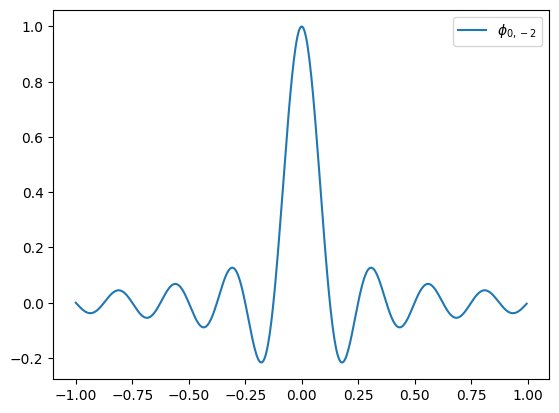

In [7]:
# kc = torch.arange(-32, 33, 1)
# xc_N = (2**2)*xc - kc
kc = torch.arange(-8, 9, 1)
xc_N = (2**3)*xc - kc
phi_cN = get_phi(xc_N)
phi_cN_sc = shannon_cosine(xc_N, 3)
# for i in range(17):
#     plt.plot(xc, phi_cN_sc[:,i])
plt.plot(xc, phi_cN_sc[:,8])
plt.legend(["$\phi_{0, -2}$", "$\phi_{0, -1}$", "$\phi_{0,0}$", "$\phi_{0,1}$", "$\phi_{0,2}$"])